### Task : Classification ( Logistic Regression -> Multiclass (OneVsAll) )
#### Input Features (Predictor Variables) : alcohol, malic_acid, ash, alcalinity_of_ash, ... (13)
#### Output (Response Variable(s)) : Class (0 or 1 or 2)

### Importing the necessary modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics, datasets, base, pipeline

### Collecting, Analyzing and Visualizing the data

In [2]:
data = datasets.load_wine()
print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [3]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
# Creating a data frame

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# Checking for null values

any(df.isna().sum())

False

In [7]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
# Correlation Matrix (Pearson Correlation)

corr_matrix = df.iloc[:, :-1].corr()

corr_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [10]:
num_attr = df.columns[:-1]
num_attr_imp = ['alcohol', 'total_phenols', 'flavanoids']
target = df.columns[-1]

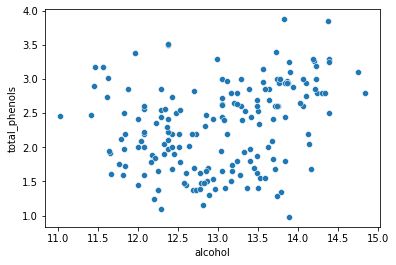

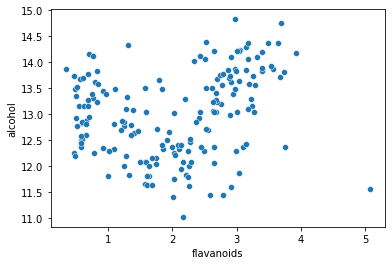

In [11]:
# Scatterplot

sns.scatterplot(x = 'alcohol', y = 'total_phenols', data = df)
plt.show()

sns.scatterplot(x = 'flavanoids', y = 'alcohol', data = df)
plt.show()

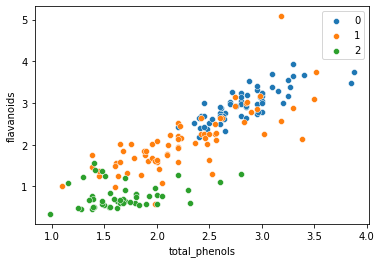

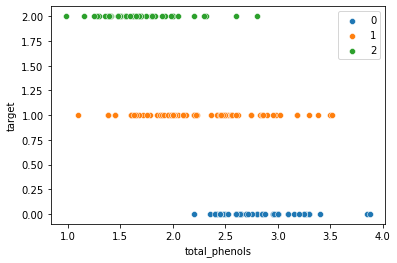

In [12]:
df0 = df[df[target] == 0]
df1 = df[df[target] == 1]
df2 = df[df[target] == 2] 

sns.scatterplot(x = 'total_phenols', y = 'flavanoids', data = df0, label = '0')
sns.scatterplot(x = 'total_phenols', y = 'flavanoids', data = df1, label = '1')
sns.scatterplot(x = 'total_phenols', y = 'flavanoids', data = df2, label = '2')
plt.legend()
plt.show()

sns.scatterplot(x = 'total_phenols', y = target, data = df0, label = '0')
sns.scatterplot(x = 'total_phenols', y = target, data = df1, label = '1')
sns.scatterplot(x = 'total_phenols', y = target, data = df2, label = '2')
plt.legend()
plt.show()

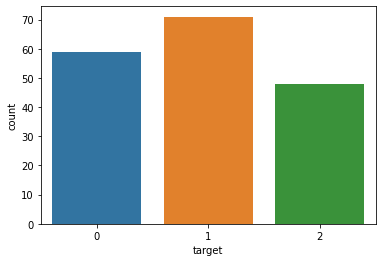

In [13]:
# Count Plot

sns.countplot(x = target, data = df)
plt.show()

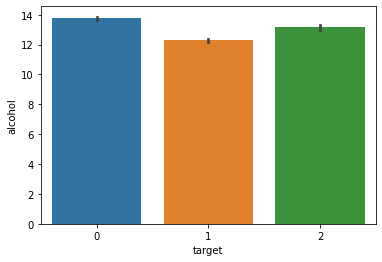

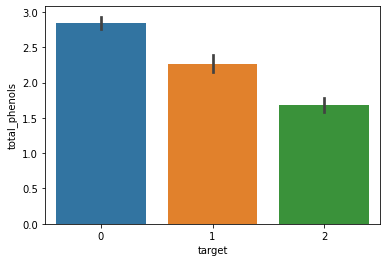

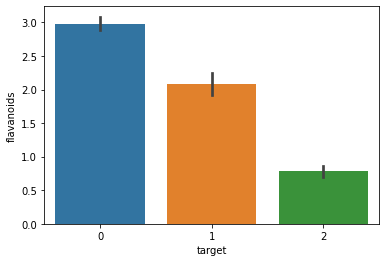

In [14]:
# Bar Chart

for var in num_attr_imp:
    sns.barplot(x = target, y = var, data = df)
    plt.show()

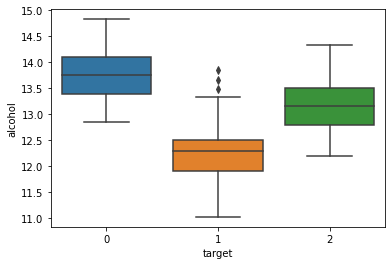

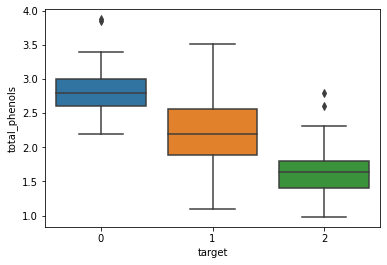

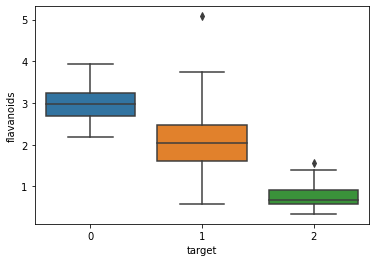

In [15]:
# Box Plot (Identifying the skewness)

for var in num_attr_imp:
    sns.boxplot(x = target, y = var, data = df)
    plt.show()

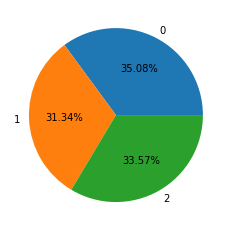

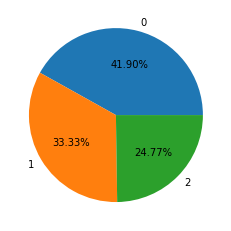

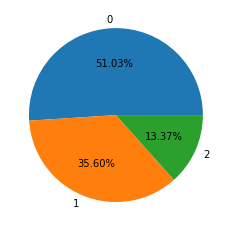

In [16]:
# Pie Chart

for var in num_attr_imp:
    plt.pie(x = df.groupby(target)[var].mean(), labels = np.unique(df[target]), autopct = "%.2f%%")
    plt.show()

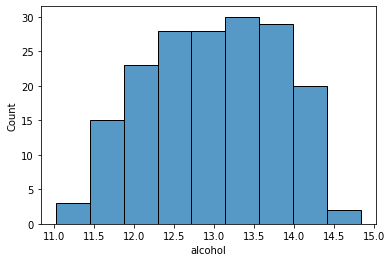

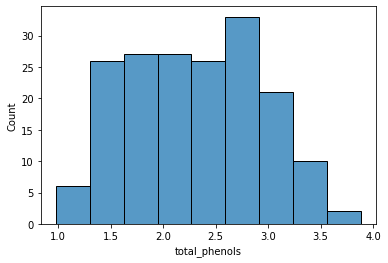

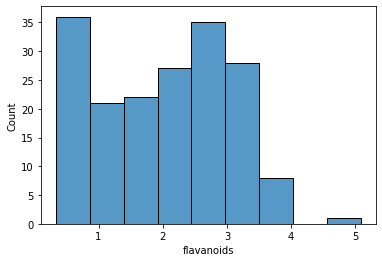

In [17]:
# Historgram

for var in num_attr_imp:
    sns.histplot(x = var, data = df)
    plt.show()

### Data Preprocessing and Preparation

In [18]:
# Creating a transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

In [19]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df[[target]]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [20]:
print(train_set.shape, test_set.shape)

(142, 14) (36, 14)


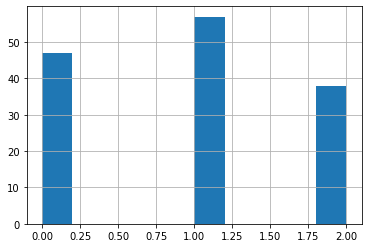

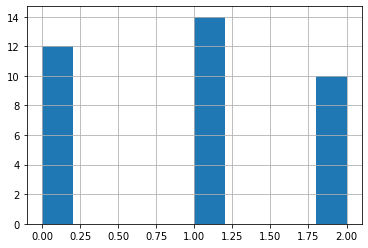

In [21]:
# Checking whether the samples are uniformely distributed

train_set[target].hist()
plt.show()

test_set[target].hist()
plt.show()

In [22]:
# Scaling the features

train_set_scaled = p.fit_transform(train_set.iloc[:, :-1])

train_set_scaled = np.c_[train_set_scaled, train_set.iloc[:, -1]]

### Training the model and Evaluating it's performance

In [25]:
X_train = train_set_scaled[:, :-1]
y_train = train_set_scaled[:, -1].astype(int)

In [26]:
class LogisticRegression:
    
    def __init__(self, max_iter = 10000, lr = 0.01):
        self.max_iter = max_iter
        self.lr = lr
        self.weights = self.bias = 0
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.max_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            dw = (1 / n) * np.dot(X.T, y_pred - y)
            db = (1 / n) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_pred_prob = self.sigmoid(np.dot(X, self.weights) + self.bias)
        labels = (y_pred_prob > 0.5).astype(int)
        return labels
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
            
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [27]:
y_train_all = []
for i in range(3):
    y_train_all.append((y_train == i).astype(int))
    
y_train0, y_train1, y_train2 = y_train_all

In [28]:
# Tranining 3 Binary Classifiers (One for each class)

lg0 = LogisticRegression()
lg1 = LogisticRegression()
lg2 = LogisticRegression()

lg0.fit(X_train, y_train0)
lg1.fit(X_train, y_train1)
lg2.fit(X_train, y_train2)

y_train_pred0 = lg0.predict(X_train)
y_train_pred1 = lg1.predict(X_train)
y_train_pred2 = lg2.predict(X_train)

train_acc0 = np.sum(y_train0 == y_train_pred0) / len(y_train0)
train_acc1 = np.sum(y_train1 == y_train_pred1) / len(y_train1)
train_acc2 = np.sum(y_train2 == y_train_pred2) / len(y_train2)

print("Train Accuracy (Class 0 Classifier) :", train_acc0)
print("Train Accuracy (Class 1 Classifier) :", train_acc1)
print("Train Accuracy (Class 2 Classifier) :", train_acc2)

scores = np.array([train_acc0, train_acc1, train_acc2])

Train Accuracy (Class 0 Classifier) : 1.0
Train Accuracy (Class 1 Classifier) : 0.9929577464788732
Train Accuracy (Class 2 Classifier) : 1.0


In [160]:
# Combining individual predictions

n_classes = len(np.unique(y_train))

y_train_pred_all = np.stack([y_train_pred0, y_train_pred1, y_train_pred2], axis = 1)

y_train_pred, i = np.zeros(len(y_train_pred_all)).astype(int), 0

for x in y_train_pred_all:
    if not any(x):
        y_train_pred[i] = np.argmin(scores)
    else:
        y_train_pred[i] = np.argmax(x + scores)
    i += 1

In [161]:
acc = np.sum(y_train == y_train_pred) / len(y_train)

print("Overall Training Accuracy :", acc)

Overall Training Accuracy : 1.0


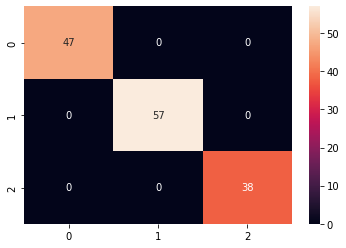

In [162]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [163]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1 = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 1.0
Recall or Sensitivity : 1.0
F1 Score : 1.0


In [164]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



### Validating the model

In [166]:
test_set_scaled = p.fit_transform(test_set.iloc[:, :-1])

test_set_scaled = np.c_[test_set_scaled, test_set.iloc[:, -1]]

In [167]:
X_test = test_set_scaled[:, :-1]
y_test = test_set_scaled[:, -1].astype(int)

In [170]:
y_test_all = []
for i in range(3):
    y_test_all.append((y_test == i).astype(int))
    
y_test0, y_test1, y_test2 = y_test_all

In [171]:
y_test_pred0 = lg0.predict(X_test)
y_test_pred1 = lg1.predict(X_test)
y_test_pred2 = lg2.predict(X_test)

test_acc0 = np.sum(y_test0 == y_test_pred0) / len(y_test0)
test_acc1 = np.sum(y_test1 == y_test_pred1) / len(y_test1)
test_acc2 = np.sum(y_test2 == y_test_pred2) / len(y_test2)

print("Test Accuracy (Class 0 Classifier) :", test_acc0)
print("Test Accuracy (Class 1 Classifier) :", test_acc1)
print("Test Accuracy (Class 2 Classifier) :", test_acc2)

scores = np.array([test_acc0, test_acc1, test_acc2])

Test Accuracy (Class 0 Classifier) : 1.0
Test Accuracy (Class 1 Classifier) : 1.0
Test Accuracy (Class 2 Classifier) : 1.0


In [173]:
# Combining individual predictions

n_classes = len(np.unique(y_test))

y_test_pred_all = np.stack([y_test_pred0, y_test_pred1, y_test_pred2], axis = 1)

y_test_pred, i = np.zeros(len(y_test_pred_all)).astype(int), 0

for x in y_test_pred_all:
    if not any(x):
        y_test_pred[i] = np.argmin(scores)
    else:
        y_test_pred[i] = np.argmax(x + scores)
    i += 1

In [175]:
acc = np.sum(y_test == y_test_pred) / len(y_test)

print("Overall Testing Accuracy :", acc)

Overall Testing Accuracy : 1.0


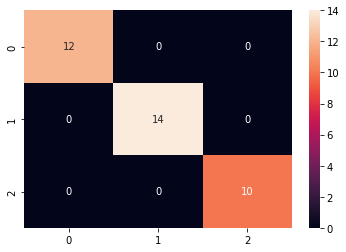

In [176]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [177]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 1.0
Recall or Sensitivity : 1.0
F1 Score : 1.0


In [178]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.98      0.99        57
           2       1.00      1.00      1.00        38

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



#### Cross Validation

In [185]:
scores = model_selection.cross_val_score(linear_model.LogisticRegression(), X_train, y_train, cv = 10)

print(np.sum(scores) / len(scores))

0.9714285714285715
